In [300]:
import sys
sys.path.append('../..')
%load_ext autoreload
%autoreload 2

import pennylane as qml
import pennylane.numpy as np

from src.tests import calculate_heisenberg_runtime_vs_qubits, calculate_heisenberg_runtime_fidelity_vs_qubits, calculate_sv_samples
from src.plots import plot_runtimes_vs_qubits, plot_error_vs_qubits
from src.helpers import calculate_error, calculate_avg_dms, calculate_mean, calculate_std_vs_ntraj, calculate_mean_vs_ntraj
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Parameters Definition

In [399]:
num_wires_list = range(2, 8)
couplings = {"J_xx": 1, "J_yy":2, "J_zz": 1, "h": 0.5}
T = 1
depth = 10
p = 0

In [8]:
dev = qml.device('lightning.qubit', wires=2)

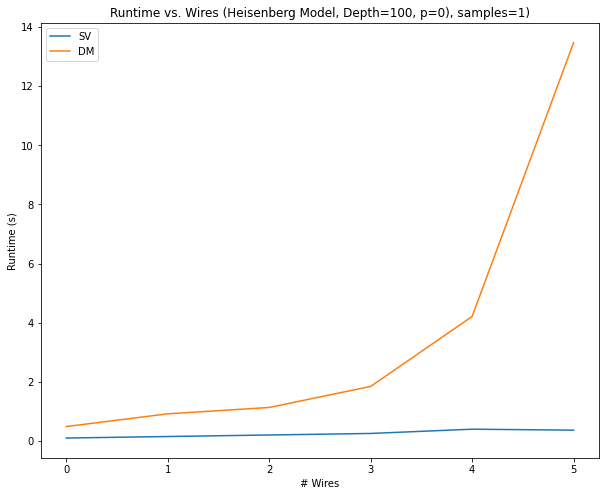

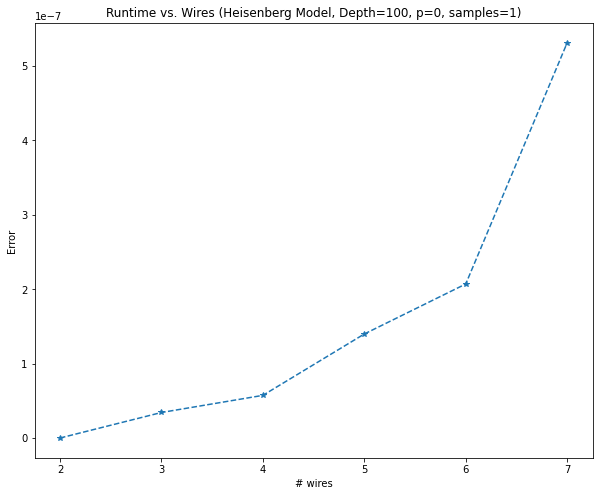

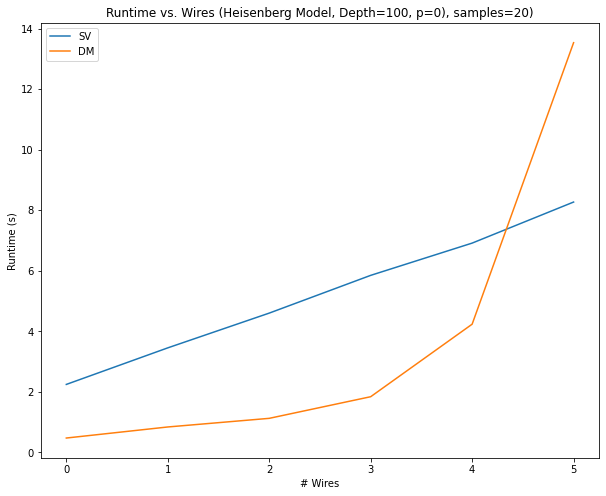

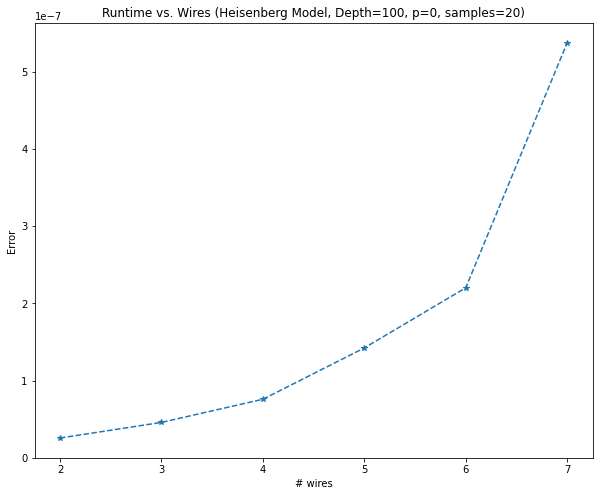

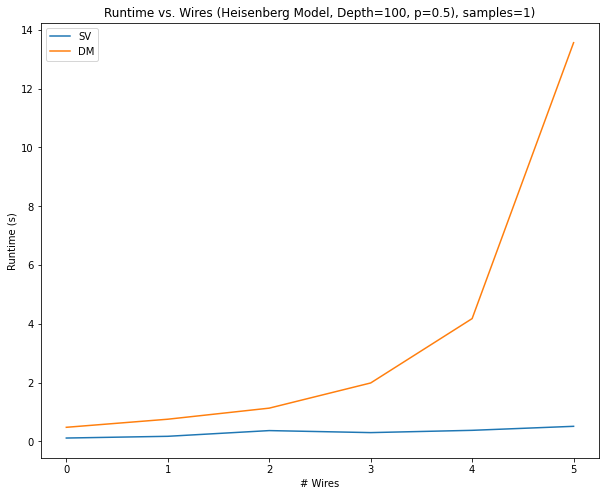

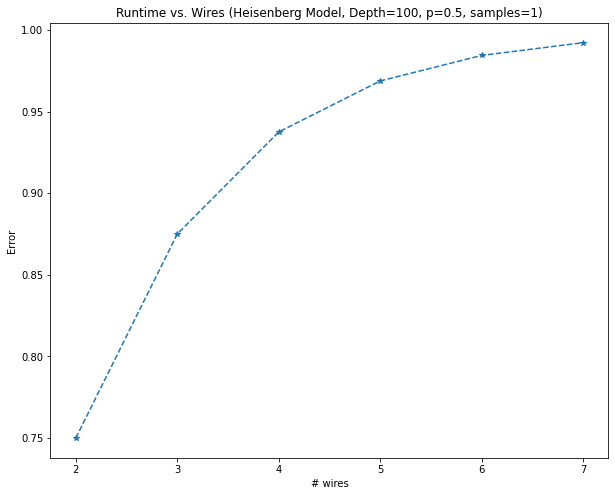

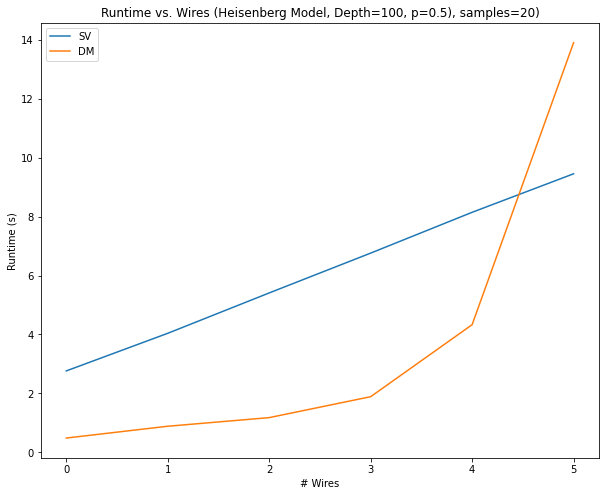

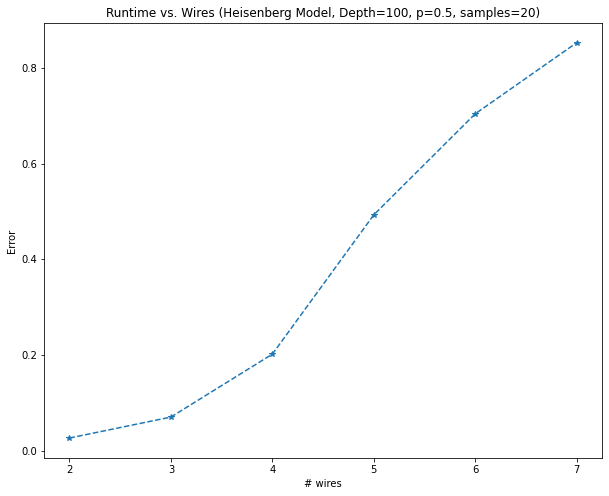

In [148]:
ps = [0,0.5]
samples = [1, 20]
for p in ps:
    for s in samples:
        times_dm, states_dm = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list, couplings, T, depth, p=p)
        times_sv, states_sv = calculate_heisenberg_runtime_fidelity_vs_qubits("lightning.qubit", num_wires_list, couplings, T, depth, p=p, samples=s)
        errors = [calculate_error(states_sv[i], states_dm[i]) for i in range(len(states_dm))]
        plot_runtimes_vs_qubits(times_sv, times_dm, depth, p=p, labels=["SV", "DM"], samples=s, save=True)
        plot_error_vs_qubits(num_wires_list, errors, depth, p=p, samples=s)

# Samples vs convergence

In [149]:
p=0.1
_, ideal_dm = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list, couplings, T, depth, p=p)
samples_conv = [5,10,20,50]
errors_s = []
for s in samples_conv:
    _, states_sv = calculate_heisenberg_runtime_fidelity_vs_qubits("lightning.qubit", num_wires_list, couplings, T, depth, p=p, samples=s)
    errors_s.append([calculate_error(states_sv[i], ideal_dm[i]) for i in range(len(states_sv))])

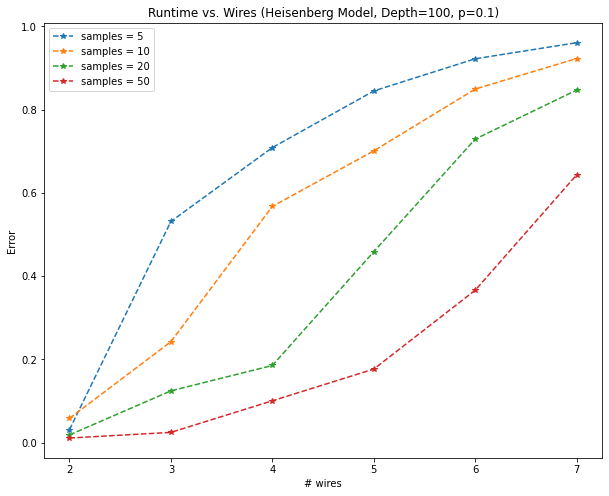

In [155]:
plt.figure(figsize=[10, 8])

plt.title(f"Runtime vs. Wires (Heisenberg Model, Depth={depth}, p={p})")
plt.xlabel("# wires")
plt.ylabel("Error")
for i in range(len(errors_s)):
    plt.plot(num_wires_list, errors_s[i], marker='*', linestyle='--', label=f'samples = {samples_conv[i]}')

plt.savefig(f"error_vs_qubits_different_samples.pdf", format="pdf", bbox_inches='tight')
plt.legend()
plt.show()

In [158]:
p=0.0033
_, ideal_dm = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list, couplings, T, depth, p=p)
samples_conv = [5,10,20,50]
errors_s = []
for s in samples_conv:
    _, states_sv = calculate_heisenberg_runtime_fidelity_vs_qubits("lightning.qubit", num_wires_list, couplings, T, depth, p=p, samples=s)
    errors_s.append([calculate_error(states_sv[i], ideal_dm[i]) for i in range(len(states_sv))])

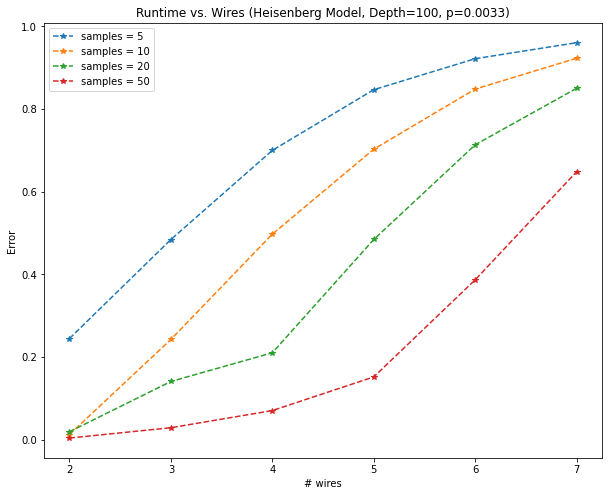

In [159]:
plt.figure(figsize=[10, 8])

c

In [161]:
p=0.0033
_, ideal_dm = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list, couplings, T, depth, p=p)
samples_conv = [100]
errors_s_100= []
for s in samples_conv:
    _, states_sv = calculate_heisenberg_runtime_fidelity_vs_qubits("lightning.qubit", num_wires_list, couplings, T, depth, p=p, samples=s)
    errors_s_100.append([calculate_error(states_sv[i], ideal_dm[i]) for i in range(len(states_sv))])

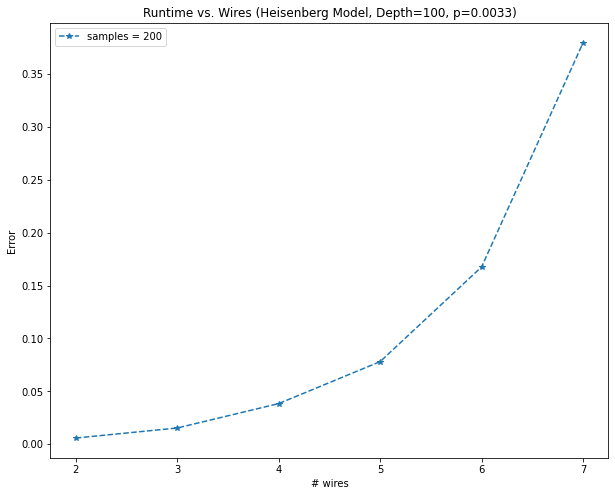

In [165]:
plt.figure(figsize=[10, 8])

plt.title(f"Runtime vs. Wires (Heisenberg Model, Depth={depth}, p={p})")
plt.xlabel("# wires")
plt.ylabel("Error")
for i in range(len(errors_s_100)):
    plt.plot(num_wires_list, errors_s_100[i], marker='*', linestyle='--', label=f'samples = {samples_conv[i]}')

plt.savefig(f"error_vs_qubits_100samples.pdf", format="pdf", bbox_inches='tight')
plt.legend()
plt.show()

In [163]:
p=0.0033
_, ideal_dm = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list, couplings, T, depth, p=p)
samples_conv = [200]
errors_s_200= []
for s in samples_conv:
    _, states_sv = calculate_heisenberg_runtime_fidelity_vs_qubits("lightning.qubit", num_wires_list, couplings, T, depth, p=p, samples=s)
    errors_s_200.append([calculate_error(states_sv[i], ideal_dm[i]) for i in range(len(states_sv))])

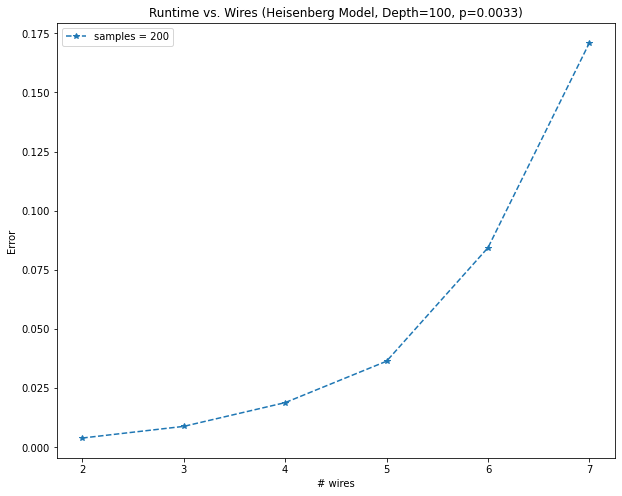

In [166]:
plt.figure(figsize=[10, 8])

plt.title(f"Runtime vs. Wires (Heisenberg Model, Depth={depth}, p={p})")
plt.xlabel("# wires")
plt.ylabel("Error")
for i in range(len(errors_s_200)):
    plt.plot(num_wires_list, errors_s_200[i], marker='*', linestyle='--', label=f'samples = {samples_conv[i]}')

plt.savefig(f"error_vs_qubits_200samples.pdf", format="pdf", bbox_inches='tight')
plt.legend()
plt.show()

In [167]:
p=0.0033
_, ideal_dm = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list, couplings, T, depth, p=p)
samples_conv = [500]
errors_s_500= []
for s in samples_conv:
    _, states_sv = calculate_heisenberg_runtime_fidelity_vs_qubits("lightning.qubit", num_wires_list, couplings, T, depth, p=p, samples=s)
    errors_s_500.append([calculate_error(states_sv[i], ideal_dm[i]) for i in range(len(states_sv))])

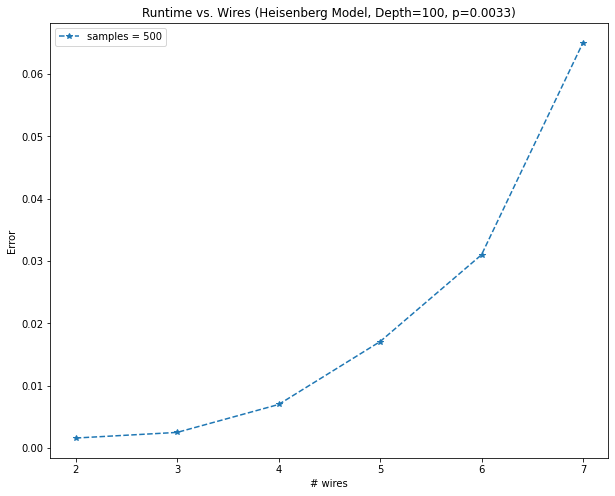

In [168]:
plt.figure(figsize=[10, 8])

plt.title(f"Runtime vs. Wires (Heisenberg Model, Depth={depth}, p={p})")
plt.xlabel("# wires")
plt.ylabel("Error")
for i in range(len(errors_s_500)):
    plt.plot(num_wires_list, errors_s_500[i], marker='*', linestyle='--', label=f'samples = {samples_conv[i]}')

plt.savefig(f"error_vs_qubits_500samples.pdf", format="pdf", bbox_inches='tight')
plt.legend()
plt.show()

In [169]:
time500 = _
time500

[60.80070933303796,
 88.70241337502375,
 116.35447999997996,
 151.58670670806896,
 184.6637475420721,
 205.93333641707432]

In [170]:
p=0.0033
_, ideal_dm = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list, couplings, T, depth, p=p)
samples_conv = [200]
errors_s_1000= []
for s in samples_conv:
    time1000, states_sv = calculate_heisenberg_runtime_fidelity_vs_qubits("lightning.qubit", num_wires_list, couplings, T, depth, p=p, samples=s)
    errors_s_1000.append([calculate_error(states_sv[i], ideal_dm[i]) for i in range(len(states_sv))])

In [172]:
states_sv_1000 = states_sv

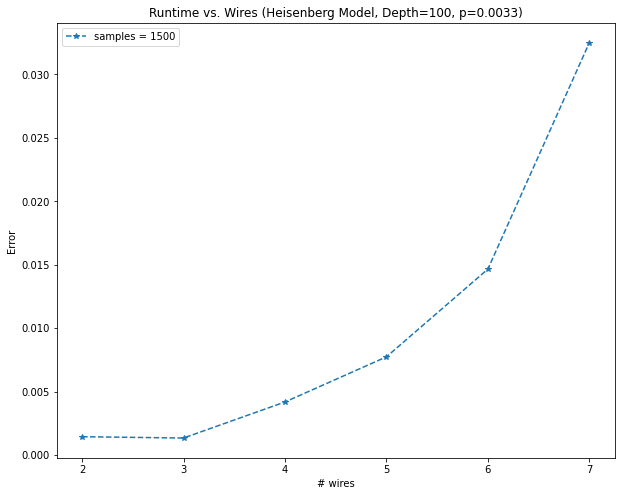

In [177]:
plt.figure(figsize=[10, 8])

plt.title(f"Runtime vs. Wires (Heisenberg Model, Depth={depth}, p={p})")
plt.xlabel("# wires")
plt.ylabel("Error")
for i in range(len(errors_s_1000)):
    plt.plot(num_wires_list, errors_s_1000[i], marker='*', linestyle='--', label=f'samples = {samples_conv[i]}')

plt.savefig(f"error_vs_qubits_1000samples.pdf", format="pdf", bbox_inches='tight')
plt.legend()
plt.show()

In [173]:
p=0.0033
_, ideal_dm = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list, couplings, T, depth, p=p)
samples_conv = [1500]
errors_s_1500= []
for s in samples_conv:
    time1500, states_sv_1500 = calculate_heisenberg_runtime_fidelity_vs_qubits("lightning.qubit", num_wires_list, couplings, T, depth, p=p, samples=s)
    errors_s_1500.append([calculate_error(states_sv_1500[i], ideal_dm[i]) for i in range(len(states_sv))])

In [185]:
errors_s_1500 = []
errors_s_1500.append([calculate_error(states_sv_1500[i], ideal_dm[i]) for i in range(len(states_sv))])

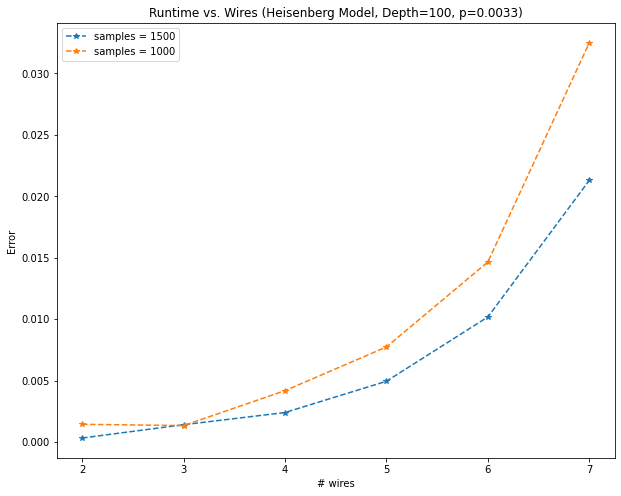

In [186]:
plt.figure(figsize=[10, 8])

plt.title(f"Runtime vs. Wires (Heisenberg Model, Depth={depth}, p={p})")
plt.xlabel("# wires")
plt.ylabel("Error")
plt.plot(num_wires_list, errors_s_1500[0], marker='*', linestyle='--', label=f'samples = 1500')
plt.plot(num_wires_list, errors_s_1000[0], marker='*', linestyle='--', label=f'samples = 1000')

#plt.savefig(f"error_vs_qubits_1500samples.pdf", format="pdf", bbox_inches='tight')
plt.legend()
plt.show()

In [250]:
errors_s_1500[0][3]

0.004950278994262369

In [407]:
# I wanna do one for a single wires number.
times_5q, states_5q = calculate_sv_samples(couplings, backend='lightning.qubit', T=1, depth=10, wires=5, p=0.0033, samples=1500)

In [195]:
# use the function in the states
len(states_5q)

1500

In [401]:
times_10q, states_10q = calculate_sv_samples(couplings, backend='lightning.qubit', T=1, depth=10, wires=10, p=0.0033, samples=1500)

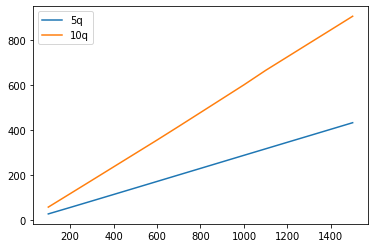

In [199]:
plt.plot(np.arange(100,1501,100),times_5q, label='5q')
plt.plot(np.arange(100,1501,100),times_10q, label='10q')
plt.legend()

In [275]:
# checking convergence for 5 qubits
ntrajs, stds, exp, scale = calculate_std_vs_ntraj(ideal_dm[3], states_5q)

In [277]:
scale = exp[2]/stds[2]

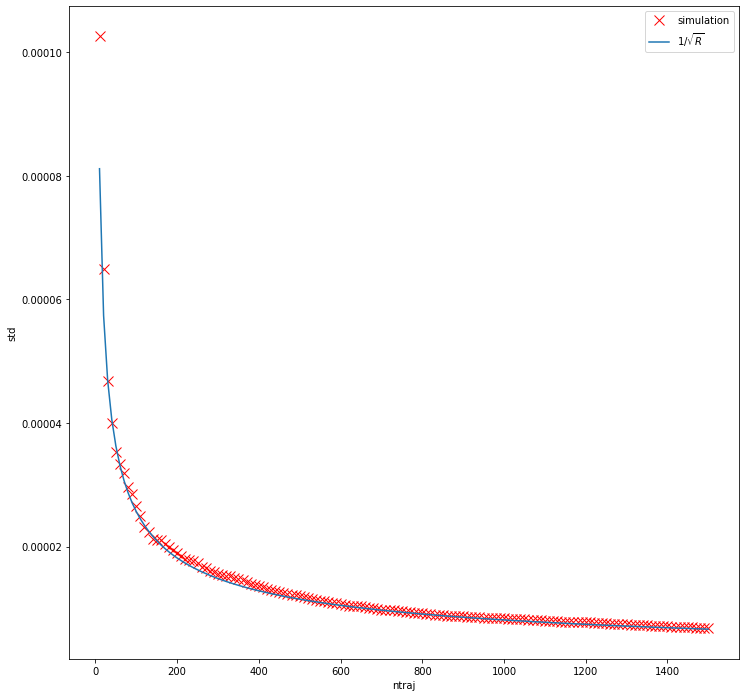

In [278]:
plt.figure(figsize=(12,12))
plt.plot(ntrajs[1:], stds, 'rx', markersize=10,label='simulation')
plt.plot(ntrajs[1:], exp/scale, label=r"$1/\sqrt{R}$")
plt.xlabel('ntraj')
plt.ylabel('std')
plt.legend()

In [280]:
ntrajs_paper, stds_paper, exp_paper, scale_paer = calculate_std_vs_ntraj(ideal_dm[3], states_5q, mode='paper')

In [298]:
scale_paer = exp_paper[7]/stds_paper[7]

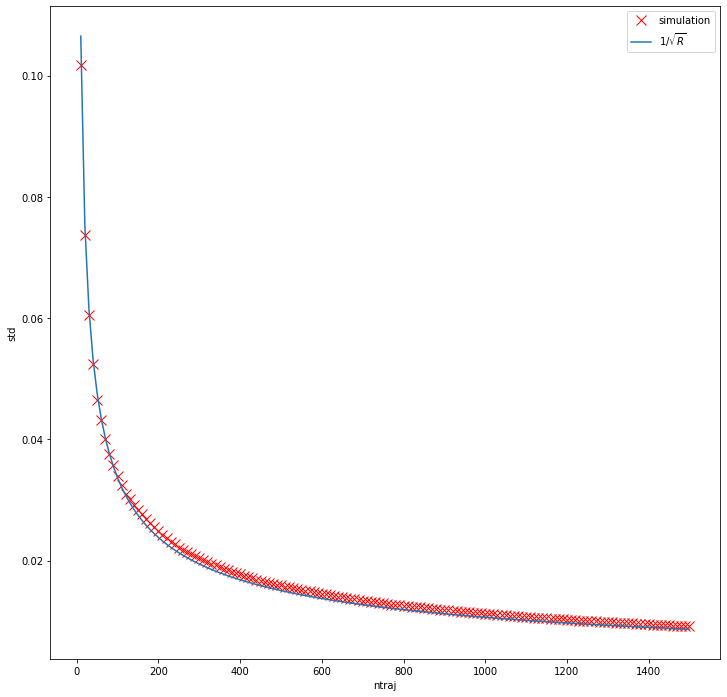

In [299]:
plt.figure(figsize=(12,12))
plt.plot(ntrajs_paper[1:], stds_paper, 'rx', markersize=10,label='simulation')
plt.plot(ntrajs_paper[1:], exp_paper/scale_paer, label=r"$1/\sqrt{R}$")
plt.xlabel('ntraj')
plt.ylabel('std')
plt.legend()

In [301]:
ntrajs, means = calculate_mean_vs_ntraj(obs=ideal_dm[3], vectors=states_5q, mode='paper')

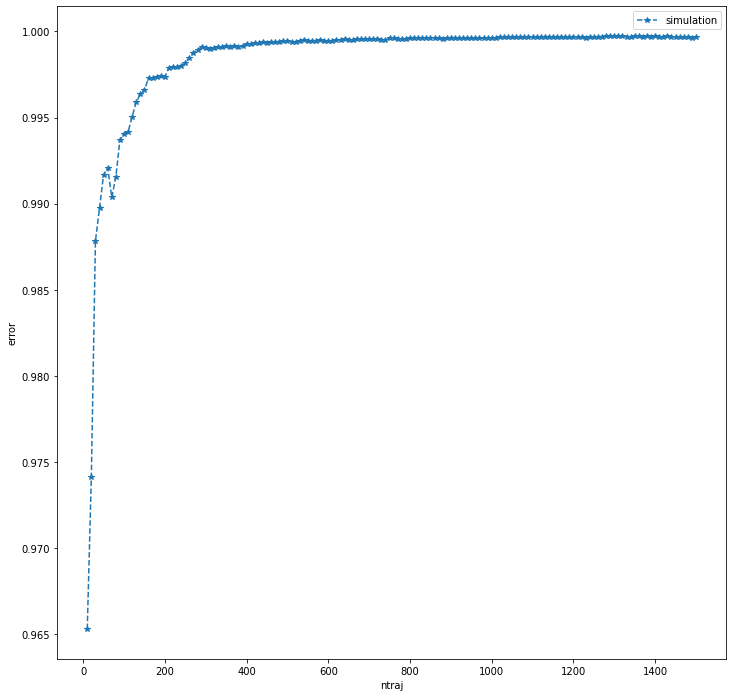

In [306]:
plt.figure(figsize=(12,12))
#plt.plot(ntrajs_paper[1:], [1 - m for m in means],  marker='*', linestyle='--' ,label='simulation')
plt.plot(ntrajs_paper[1:], means,  marker='*', linestyle='--' ,label='simulation')
plt.xlabel('ntraj')
plt.ylabel('error')
plt.legend()

In [313]:
# now running the ideal one for many qubits series
num_wires_list_long = range(2, 10)
times_long, ideal_dm_long = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list_long, couplings, T=1, depth=100, p=0.0033)

In [400]:
# now running the ideal one for many qubits series
num_wires_list_10 = range(10, 11)
times_10, ideal_dm_10 = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list_10, couplings, T=1, depth=10, p=0.0033)

In [408]:
# now running the ideal one for many qubits series
num_wires_list_5 = range(5, 6)
times_5, ideal_dm_5 = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list_5, couplings, T=1, depth=10, p=0.0033)

In [444]:
# now running the ideal one for many qubits series
num_wires_list_up10 = range(2, 11)
times_up10, ideal_dm_up10 = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list_up10, couplings, T=1, depth=10, p=0.0033)

In [445]:
len(ideal_dm_up10)

9

In [427]:
# now running the ideal one for many qubits series
num_wires_list_up9 = range(6, 10)
times_up9, ideal_dm_9 = calculate_heisenberg_runtime_fidelity_vs_qubits("default.mixed", num_wires_list_up9, couplings, T=1, depth=10, p=0.0033)

In [508]:
times_up10_cpu = []
states_up10_cpu = []
for wires in [2,3,4,5,6,7,8,9,10]:
    time, states = calculate_sv_samples(couplings, backend='lightning.qubit', T=1, depth=10, wires=wires, p=0.0033, samples=410)
    times_up10_cpu.append(time)
    states_up10_cpu.append(states)

In [509]:
len(states_up10_cpu[0])

410

In [510]:
wires_list_10 = [2,3,4,5,6,7,8,9,10]

In [511]:
fidelities = []
for i, w in enumerate([2,3,4,5,6,7,8,9,10]):
    print(i)
    ntraj, f = calculate_mean_vs_ntraj(obs=ideal_dm_up10[i], vectors=states_up10_cpu[i], mode='paper')
    fidelities.append(f)

0
1
2
3
4
5
6
7
8


In [474]:
(fidelities[0][::10])

[0.9806002546615661, 0.9985585982938436, 0.9994507040161654, 0.999639829623963]

In [521]:
fidelities_trans = np.transpose(fidelities)
fidelities_samples = fidelities_trans[::10][:]
len(fidelities_samples)

5

In [514]:
fidelities_samples

tensor([[0.9640272 , 0.98489326, 0.97020456, 0.98408126, 0.97713414,
         0.97445894, 0.97138759, 0.9627424 , 0.9479923 ],
        [0.9866759 , 0.99798634, 0.99720206, 0.99461608, 0.99572577,
         0.99785562, 0.99478787, 0.9957304 , 0.99661539],
        [0.99808992, 0.99958888, 0.9985024 , 0.99848323, 0.99893267,
         0.99871137, 0.99762031, 0.99826222, 0.99773617],
        [0.99910101, 0.99948819, 0.99916683, 0.99882818, 0.99944638,
         0.99860843, 0.99869795, 0.99880742, 0.99847369],
        [0.99928332, 0.99960919, 0.99907009, 0.99912846, 0.99906413,
         0.99925213, 0.99914442, 0.99914118, 0.99869198]], requires_grad=True)

In [520]:
(ntraj[1::10])

[tensor(10, requires_grad=True),
 tensor(110, requires_grad=True),
 tensor(210, requires_grad=True),
 tensor(310, requires_grad=True),
 tensor(410, requires_grad=True)]

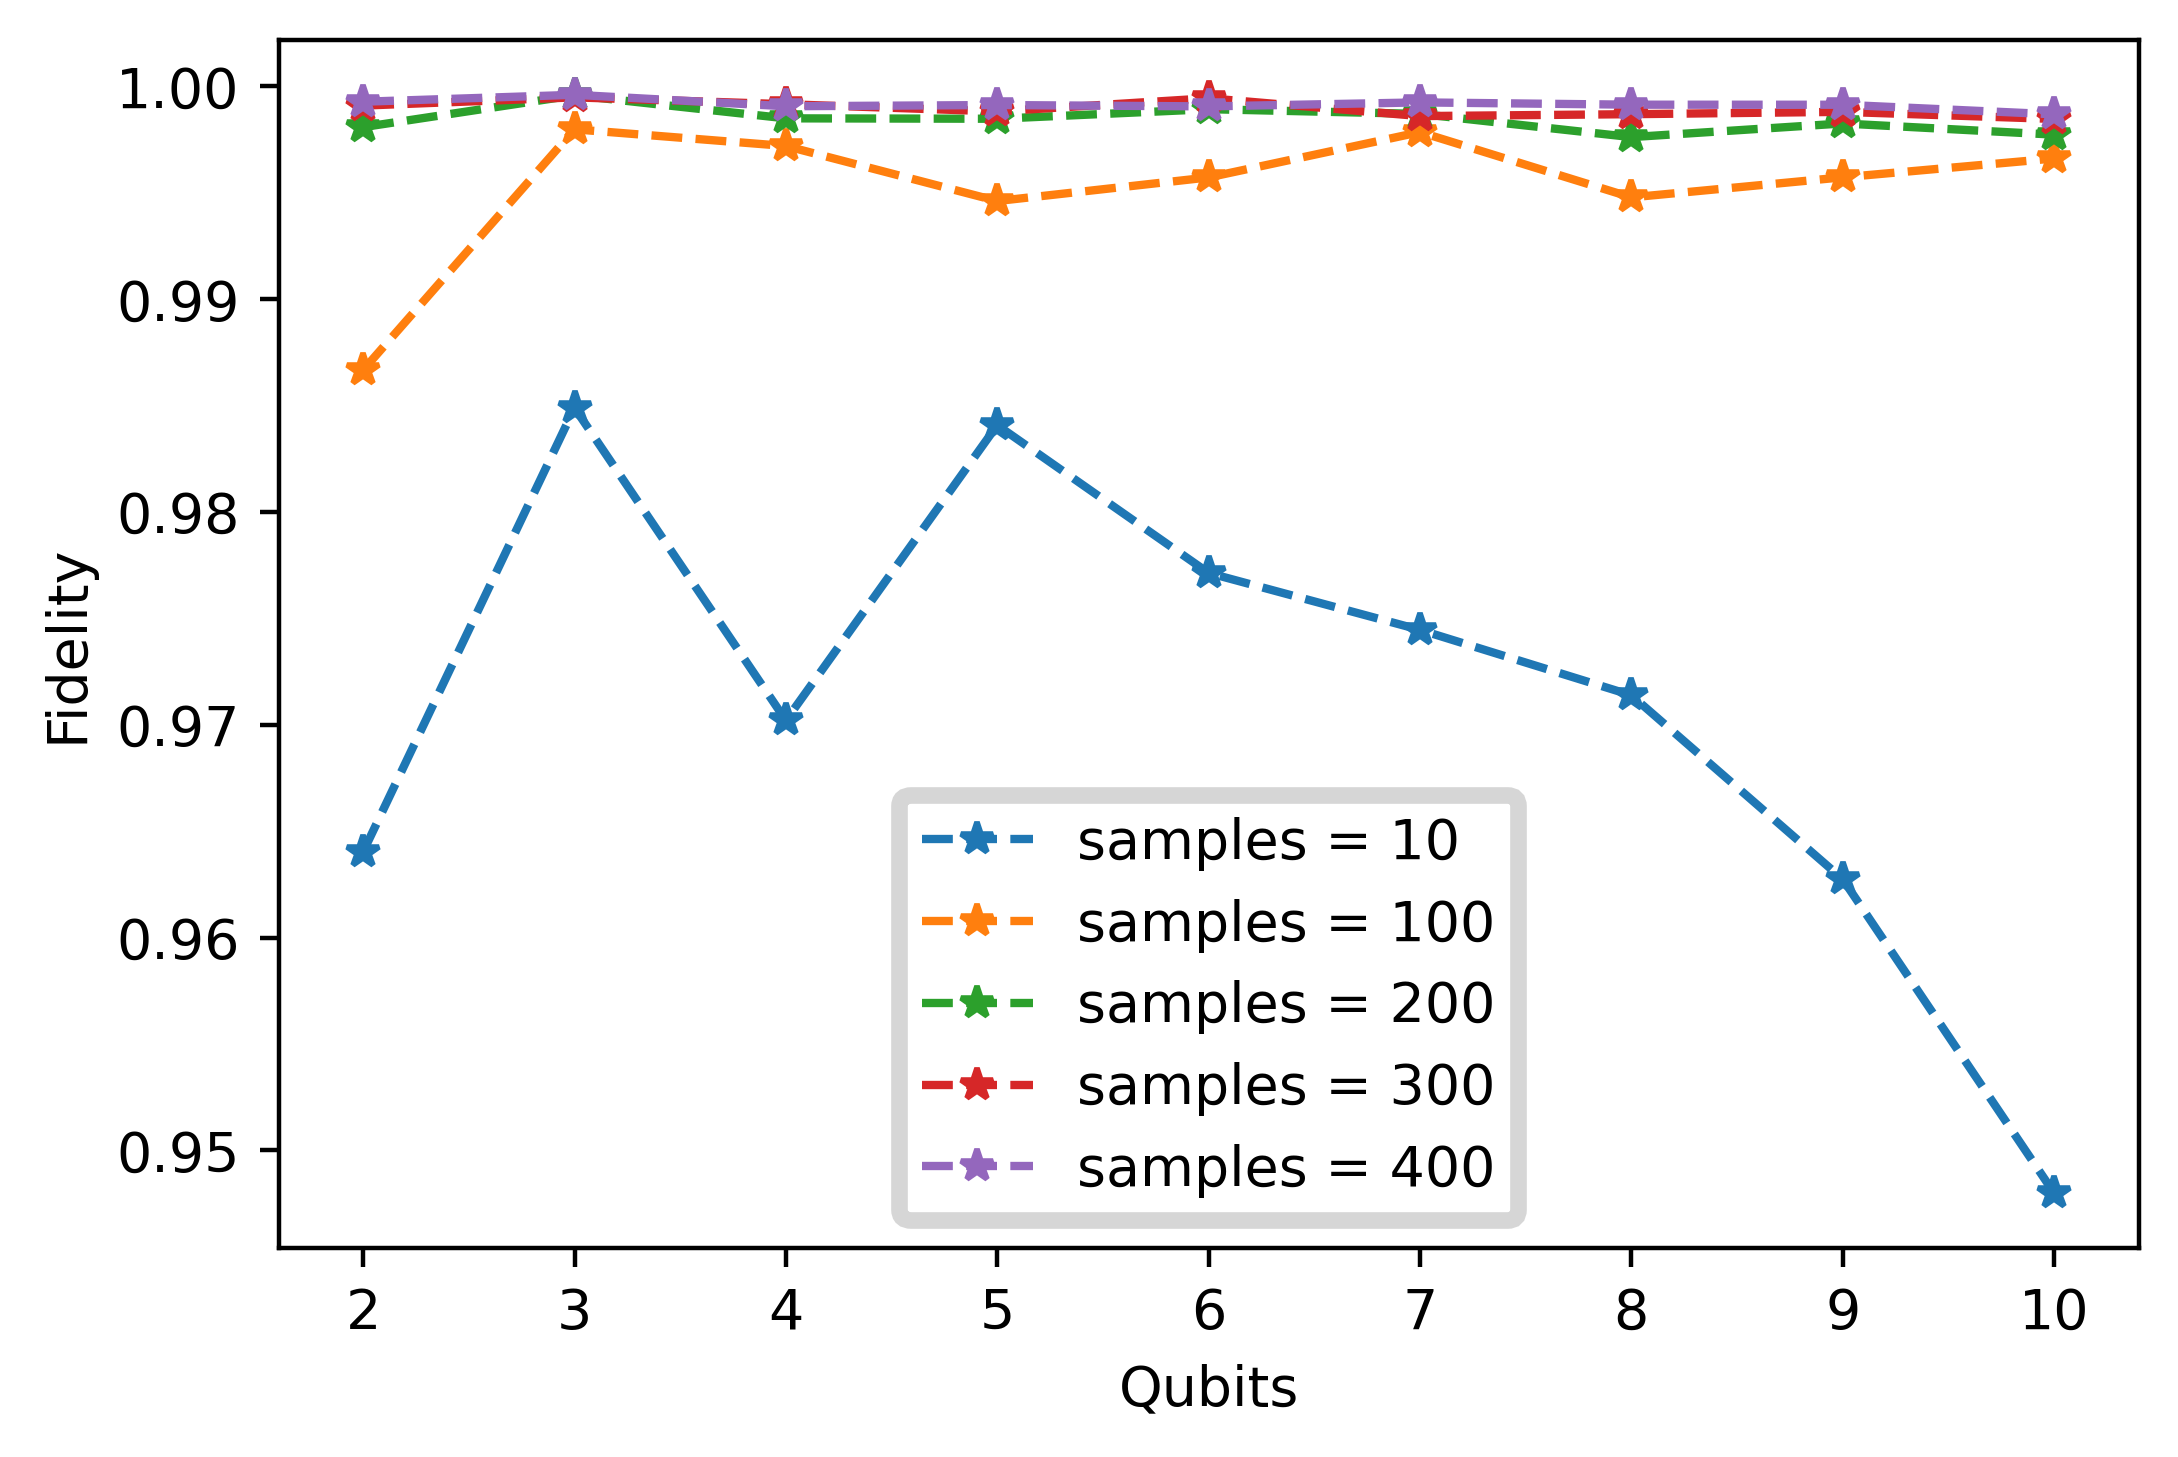

In [532]:
plt.figure(dpi=400)
plt.xlabel("Qubits")
plt.ylabel("Fidelity")
for i in range(5):
    if i == 0:
         plt.plot(wires_list_10, [f for f in fidelities_samples[i]], marker='*', linestyle='--', label=f'samples = {ntraj[1::10][i]}')
    else:
        plt.plot(wires_list_10, [f for f in fidelities_samples[i]], marker='*', linestyle='--', label=f'samples = {ntraj[1::10][i]-10}')
plt.legend()
plt.savefig(f"./final_plots/fidelity_vs_qubits_vs_samples.pdf", format="pdf", bbox_inches='tight')
plt.show()

In [402]:
ntrajs_10, means_10 = calculate_mean_vs_ntraj(obs=ideal_dm_10[-1], vectors=states_10q, mode='paper')

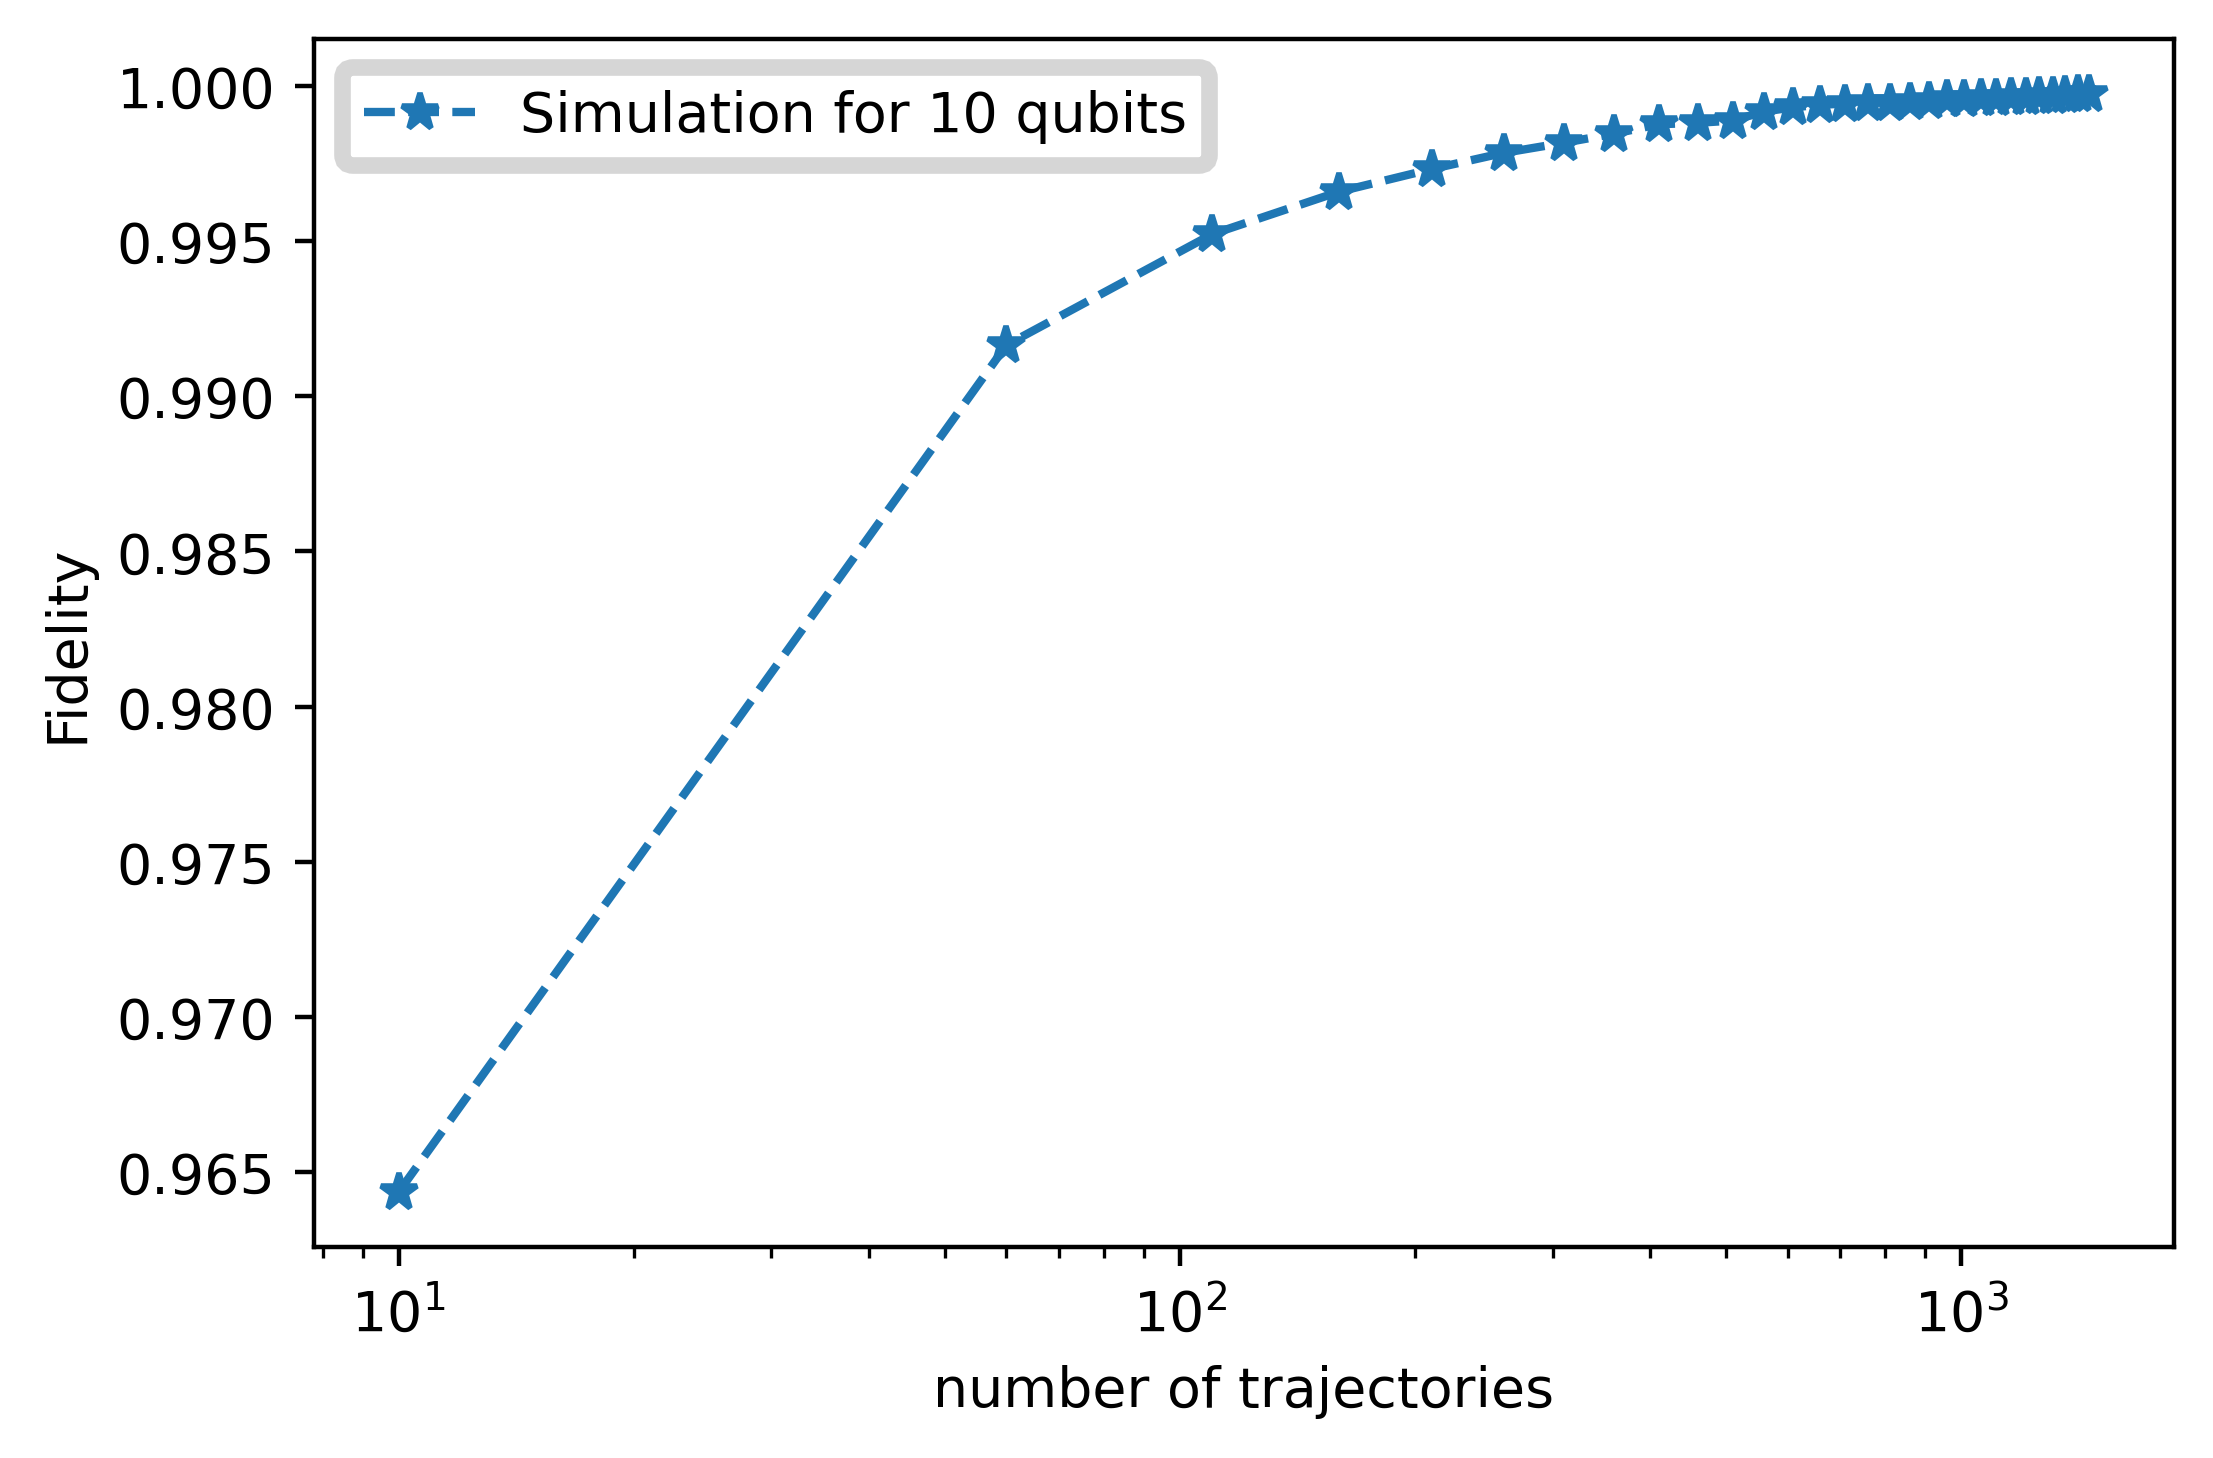

In [409]:
plt.figure(dpi=400)
plt.semilogx(ntrajs_10[1::5], [f for f in means_10[::5]],  marker='*',markersize=7, linestyle='--' ,label='Simulation for 10 qubits')
plt.xlabel('number of trajectories')
#plt.xlim(900,1500)
#plt.ylim(-0.0001, 0.004)
plt.ylabel('Fidelity')
plt.legend(loc='best')
plt.savefig(f"./final_plots/fidelity_vs_ntraj.pdf", format="pdf", bbox_inches='tight')

In [417]:
ntrajs_10_std, stds_paper_10, exp_paper_10, scale_paper_10 = calculate_std_vs_ntraj(ideal_dm_10[-1], states_10q, mode='paper')

In [423]:
scale_paper_10 = exp_paper_10[2]/stds_paper_10[2]
print(scale_paper_10)

3.6616744726186687


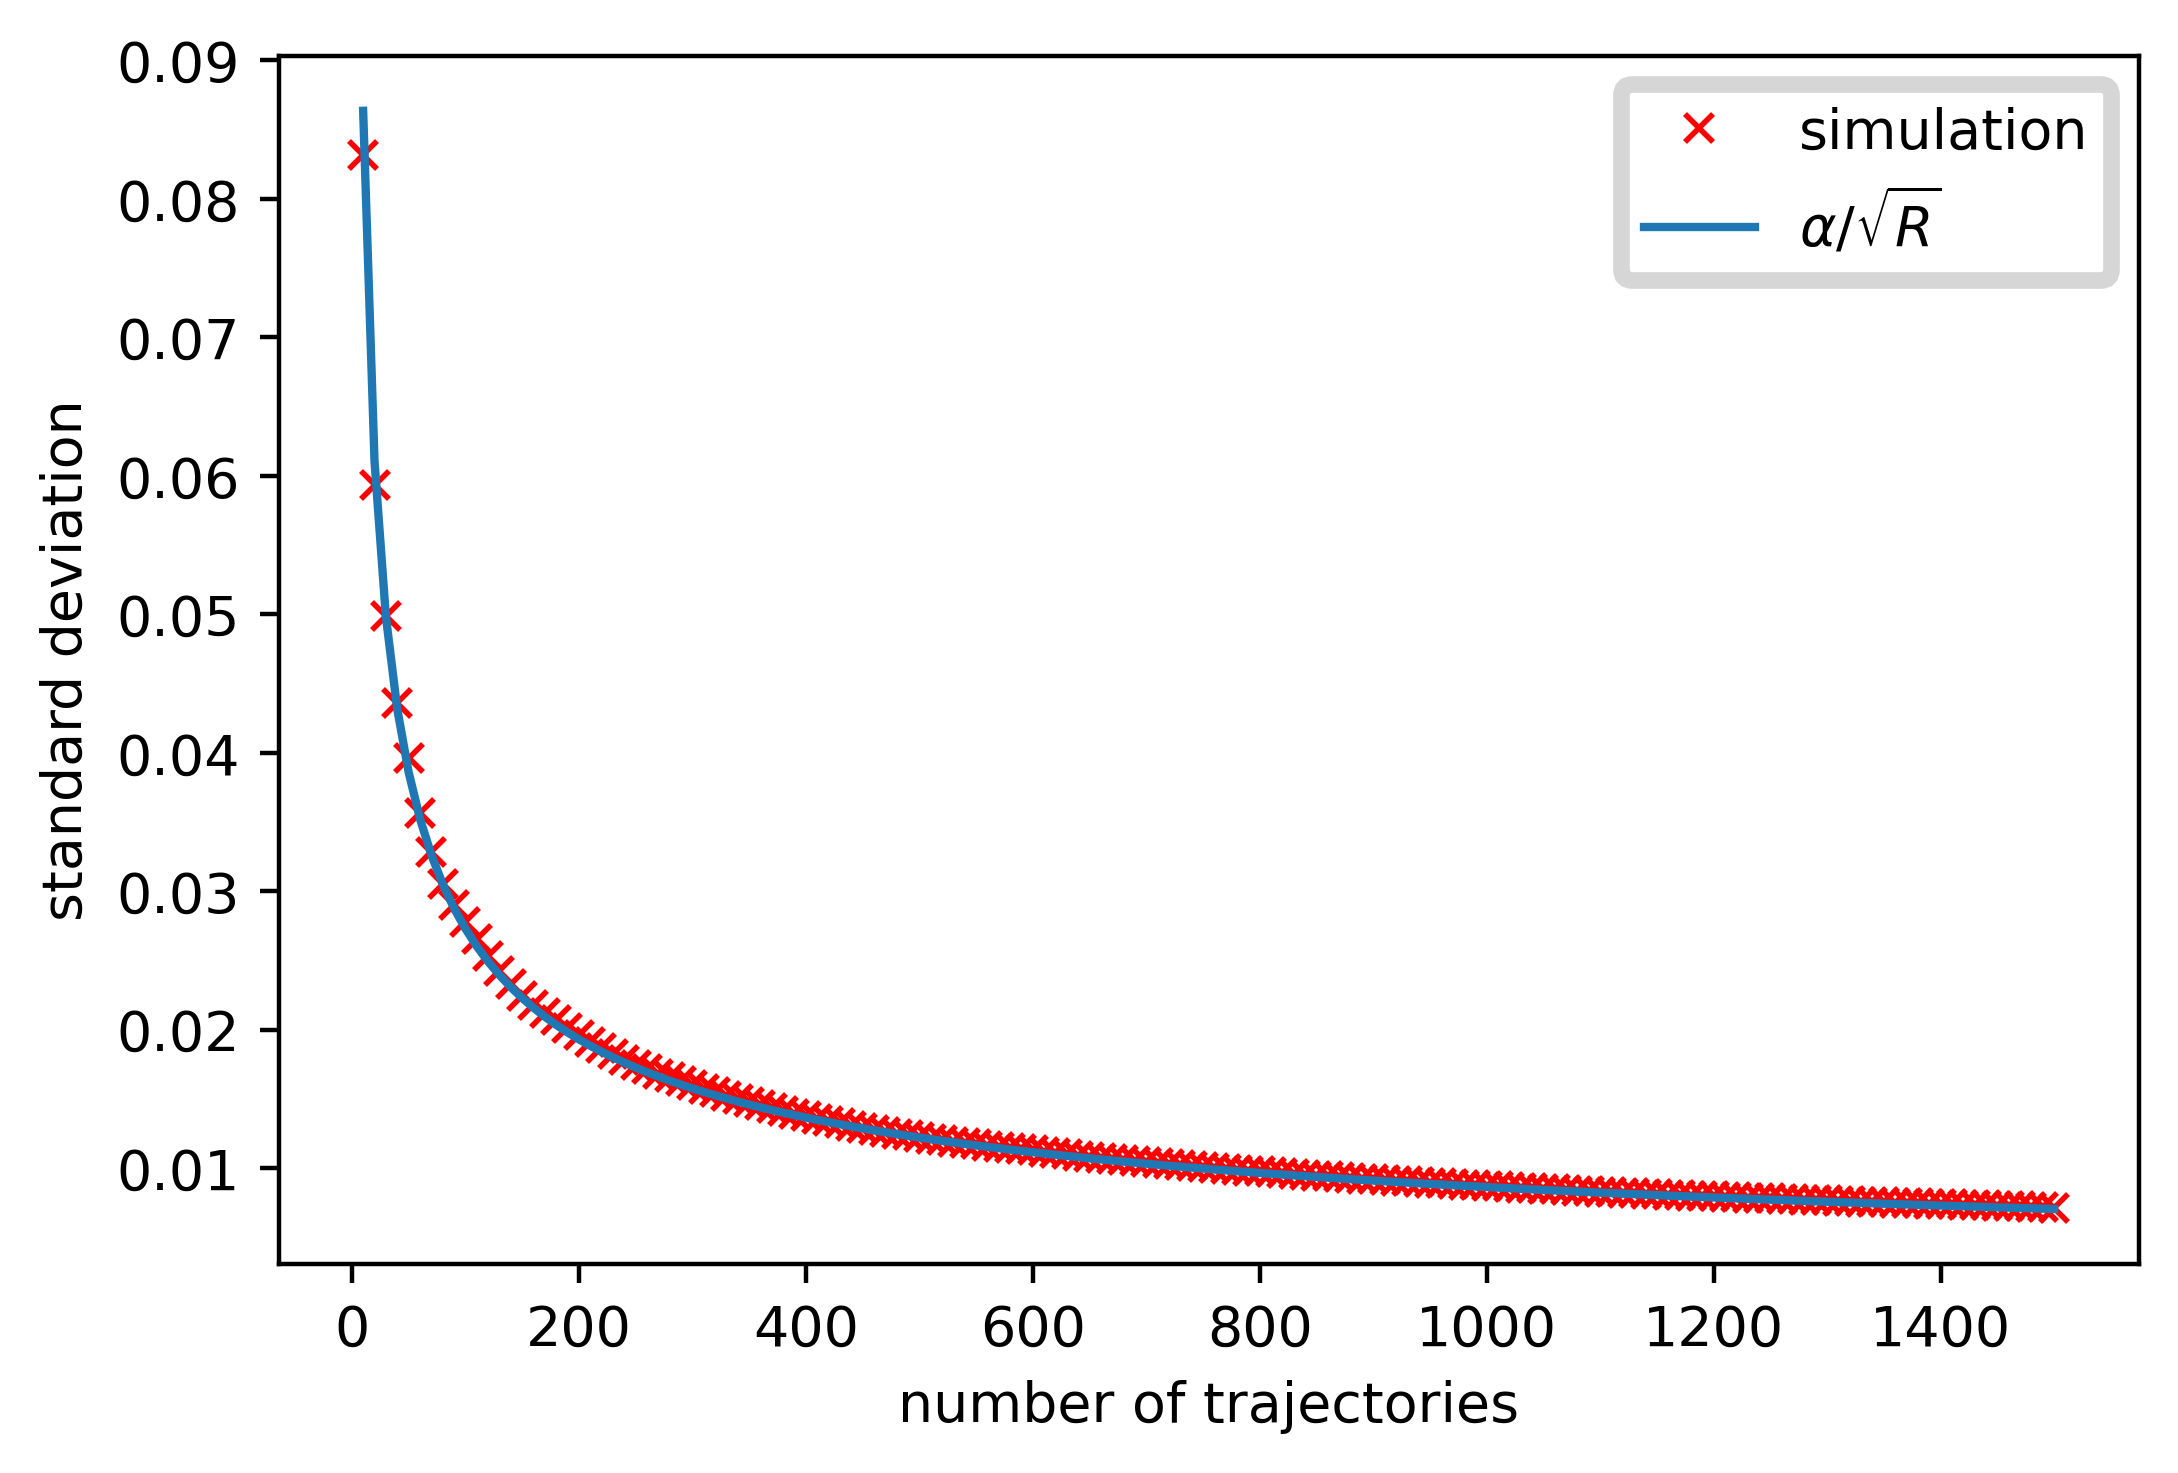

In [424]:
plt.figure(dpi=400)
plt.plot(ntrajs_10_std[1:], stds_paper_10, 'rx', markersize=5,label='simulation')
plt.plot(ntrajs_10_std[1:], exp_paper_10/scale_paper_10, label=r"${\alpha}/\sqrt{R}$")
plt.xlabel('number of trajectories')
plt.ylabel('standard deviation')
plt.legend()
plt.savefig(f"./final_plots/mc_std_vs_ntraj.pdf", format="pdf", bbox_inches='tight')

In [ ]:
# calculate fidelities
fidelities = []

In [ ]:
plt.title(f"Runtime vs. Wires (Heisenberg Model, Depth={depth}, p={p})")
plt.xlabel("# wires")
plt.ylabel("Error")
for i in range(len(errors_s)):
    plt.plot(num_wires_list, errors_s[i], marker='*', linestyle='--', label=f'samples = {samples_conv[i]}')

# plt.savefig(f"error_vs_qubits_different_samples.pdf", format="pdf", bbox_inches='tight')
plt.legend()
plt.show()

In [346]:
ntrajs_10[50]

tensor(500, requires_grad=True)

In [404]:
means_10[19]

0.9971841442339602

In [405]:
means_10[49]

0.9989520446863212

In [347]:
means_10[49]

0.9975599736365893

In [333]:
times_10q[-1]

906.9672204580856

In [334]:
times_5q[-1]

434.0154130840674

# <center> checking troterization

In [357]:
from src.hamiltonians import create_heisenberg
from src.models import simulate_heisenberg_model
from src.helpers import draw_circuit_nice

In [453]:
wires = 3
depth = 2
T = 1
p = 0
backend = "default.mixed"
dev = qml.device(backend, wires=wires)

couplings = {"J_xx": 1, "J_yy":2, "J_zz": 1, "h": 0.5}

@qml.qnode(dev)
def evolve(couplings, time, depth):
    qml.ApproxTimeEvolution(create_heisenberg(couplings, wires), time, depth)
    return qml.state()

@qml.qnode(dev)
def heisenberg_trotter(couplings, T, depth, p):
    simulate_heisenberg_model(wires, couplings, T, depth, p, backend)
    return qml.state()


# for d in range(2,20):
#     f = qml.math.fidelity(heisenberg_trotter(couplings,T=T,depth=d,p=p),evolve((1,2,1,0.5),time=T,depth=d))
#     print(f)


<Figure size 2400x1600 with 0 Axes>

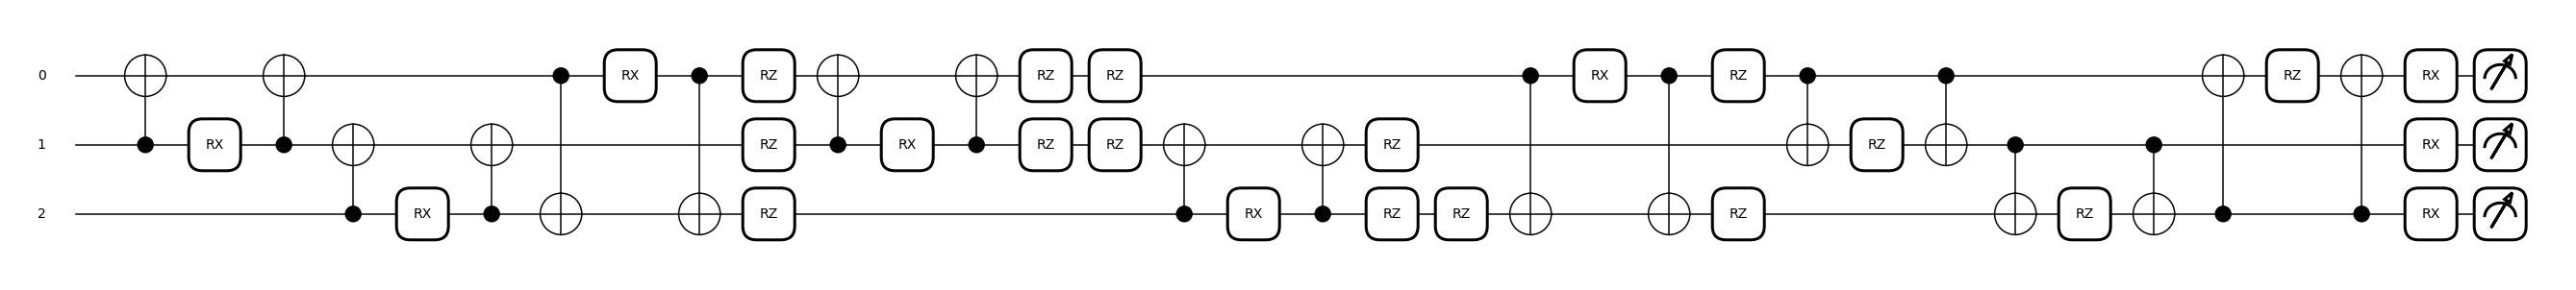

In [455]:
draw_circuit_nice(heisenberg_trotter, couplings=couplings,T=T,depth=1,p=0)

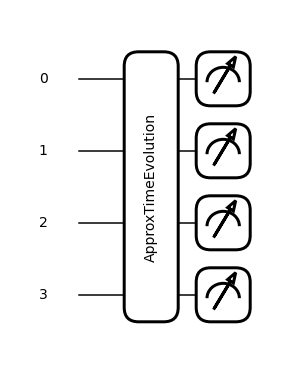

In [362]:
draw_circuit_nice(evolve,couplings=(1,2,1,0.5),time=T,depth=d)

# <center> Fidelity Check

In [241]:
#CHECK fidelity for 5 qubits and 1500 samples with this new method
f_mean_5q_1500R = calculate_mean(ideal_dm[3], states_5q)
f_mean_5q_1500R

0.031234306552076707

In [264]:
s = np.zeros_like(states_5q[0])
R = len(states_5q)
for v in states_5q:
    s += abs(v)**2
phi = s/R
sigma_exact = np.diag(ideal_dm[3])
1 - abs(np.vdot(np.sqrt(phi), np.sqrt(sigma_exact)))**2

0.00035162462627835733

In [261]:
# what if I first make the rho of average
rho_avg = calculate_avg_dms(states_5q)

(32, 32)


In [263]:
1 - qml.math.fidelity(rho_avg, ideal_dm[3])

0.005168359395464117

In [274]:
states_5q_transposed = np.transpose(states_5q)
avg = []
for fidelities in states_5q_transposed:
    avg.append(np.mean(fidelities, axis=0))
avg = np.array(avg)
qml.math.fidelity(avg, ideal_dm[3])

array(2.20129748e-05)